In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:\\Users\\nilka\\OneDrive\\Desktop\\data sc\\data_2_var.csv")

In [37]:
data.head()

,X,Y
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


# EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       1111 non-null   float64
 1   Y       1111 non-null   float64
dtypes: float64(2)
memory usage: 17.5 KB


+ So data has no null  entries

In [5]:
data.describe()

,X,Y
count,1111.000000,1111.000000
mean,6.783026,-26.187358
std,79.383668,69.794973
min,-134.962839,-132.422167
25%,-53.521987,-77.000000
50%,15.737782,-46.072638
75%,76.134647,7.435231
max,134.605775,134.425495


<AxesSubplot:>

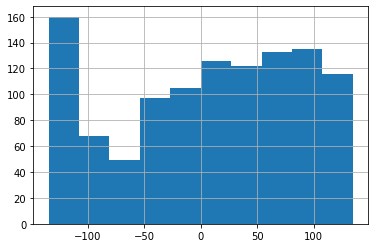

In [6]:
data.X.hist()

<AxesSubplot:>

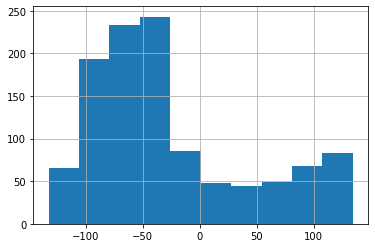

In [7]:
data.Y.hist()

### We see both columns X and Y are not normally distributed

In [8]:
print("Kurtossis for X :" ,data.X.kurt())
print("Kurtossis for Y :" ,data.Y.kurt())

Kurtossis for X : -1.1565964254850356
Kurtossis for Y : -0.2847949723366172


In [9]:
print("Skewness for X :" ,data.X.skew())
print("Skewness for Y :" ,data.Y.skew())

Skewness for X : -0.2681862847300423
Skewness for Y : 0.9078899958067838


{'whiskers': [<matplotlib.lines.Line2D at 0x18bbe157d90>,
 'caps': [<matplotlib.lines.Line2D at 0x18bbe16b460>,
 'boxes': [<matplotlib.lines.Line2D at 0x18bbe157940>],
 'medians': [<matplotlib.lines.Line2D at 0x18bbe16bb80>],
 'fliers': [<matplotlib.lines.Line2D at 0x18bbe16bf10>],
 'means': []}

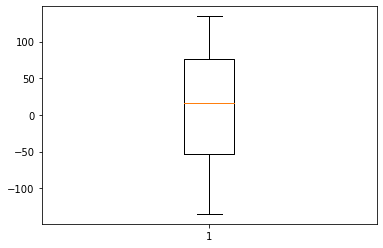

In [10]:
plt.boxplot(data.X)

{'whiskers': [<matplotlib.lines.Line2D at 0x18bbe1d14c0>,
 'caps': [<matplotlib.lines.Line2D at 0x18bbe1d1be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18bbe1d1130>],
 'medians': [<matplotlib.lines.Line2D at 0x18bbe1d9340>],
 'fliers': [<matplotlib.lines.Line2D at 0x18bbe1d96d0>],
 'means': []}

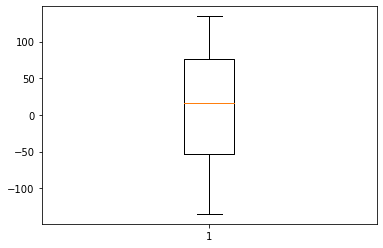

In [11]:
plt.boxplot(data.X)

### The box plots shows no outliers for either of the column

Text(0, 0.5, 'Y')

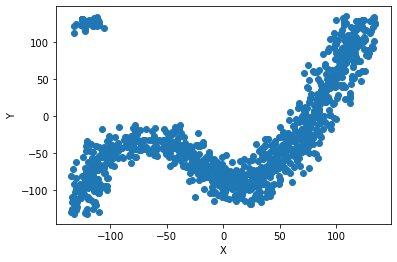

In [12]:
plt.scatter(data.X,data.Y)
plt.xlabel("X")
plt.ylabel("Y")

+ Scatter plot between X and Y does not show a linear relationship between them. So First we will perform Feature engineering on the columns and try to make relation between X and Y linear.

+ We see that all the records are forming proper pattern but few data points which are having value of X less than 50 and value of Y greater than 50 are forming a separate cluster.

+  From visual inspection of scatter plot ,We see that the records whose X values are positve are following a linear relationship with Y and values of X less than 0 are having Polynomial relation with Y.

In [13]:
df = data[(data.X<-50) & (data.Y>50)]
df


,X,Y
1072,-125.366669,131.000000
1073,-114.508654,132.424802
1074,-125.366669,131.000000
1075,-125.366669,131.000000
1076,-126.029114,123.060597
1077,-106.093619,118.532422
1078,-125.366669,131.000000
1079,-116.197531,126.190248
1080,-125.366669,131.000000
1081,-111.529664,133.579278


+ There are 39 records with the with the condition mentioned above.

In [14]:
data[(data.X<-100) & (data.Y<100)]

,X,Y
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
863,-131.366669,-125.000000
864,-129.565624,-122.630005
865,-131.366669,-125.000000
866,-134.312702,-109.974165


+ So we see that the data which are forming a cluster are in complete sequence of index. Also for similar range of X the absolute value of Y are same but the cluster has negative sign attached to it. So there is a high chance that the actual value of Y are negative for that cluster but is entered wrongly as postive.

+ So I replace those Positive value of Y with corresponding negative values.

In [15]:
Y_neg = []
for i in df.iloc[:,1]:
    Y_neg.append (-i)
    

In [16]:
Y_neg_df =pd.DataFrame(Y_neg)


In [17]:
X_neg_df = pd.DataFrame(df.X).reset_index()
X_neg_df.drop(columns = 'index',inplace=True)

In [35]:
df1 = pd.DataFrame(X_neg_df,columns =['X'])
df1['Y'] = Y_neg_df

df1

,X,Y
0,-125.366669,-131.000000
1,-114.508654,-132.424802
2,-125.366669,-131.000000
3,-125.366669,-131.000000
4,-126.029114,-123.060597
5,-106.093619,-118.532422
6,-125.366669,-131.000000
7,-116.197531,-126.190248
8,-125.366669,-131.000000
9,-111.529664,-133.579278


+ SO I have replaced all the +ve values of cluster with the -ve values. Now I need to remove the corresponding rows from main data set and replace it with these rows.

In [42]:
data_1  = data.iloc[0:1072,:]

In [45]:
df_2 = [data_1,df1]

In [51]:
final_data = pd.concat(df_2).reset_index().drop(columns='index')
final_data

,X,Y
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1106,-115.366669,-121.000000
1107,-119.954237,-123.609122
1108,-109.942155,-127.197394
1109,-111.515368,-128.170885


Text(0, 0.5, 'Y')

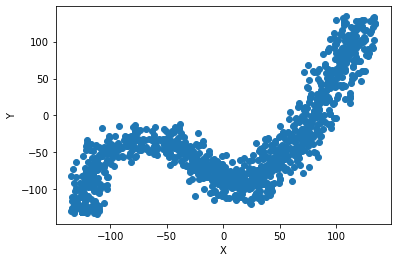

In [52]:
plt.scatter(final_data.X,final_data.Y)
plt.xlabel("X")
plt.ylabel("Y")

+ So we see that the cluster that was forming separately is replaced and we see a proper pattern in the chart.

+ From visual inspection of scatter plot ,We see that the records whose X values are positve are following a linear relationship with Y and values of X less than 0 are having Polynomial relation with Y. So I split the final data set into 2 parts , one with positve values of x and one with neagative values of x.

In [53]:
Positive_X = final_data[final_data.X>0]

In [54]:
Positive_X

,X,Y
197,2.131207,-53.048047
205,6.232962,-76.623539
210,2.633331,-76.000000
211,17.290843,-86.776182
213,7.608236,-62.595214
...,...,...
1067,134.605775,123.619680
1068,116.633331,118.000000
1069,115.862302,118.564590
1070,117.366199,99.544820


In [56]:
Positive_X.corr()

,X,Y
X,1.000000,0.922233
Y,0.922233,1.000000


Text(0, 0.5, 'Y')

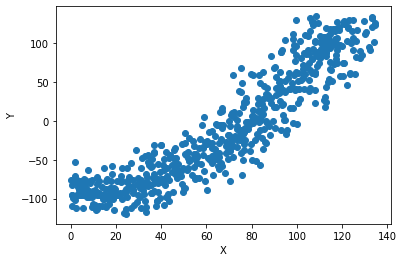

In [62]:
plt.scatter(Positive_X.X,Positive_X.Y)
plt.xlabel("X")
plt.ylabel("Y")

+ SO we see a very strong relation between X and Y for positive values of X.

### Building Linear Regression for Positive Values of X

<AxesSubplot:xlabel='X', ylabel='Y'>

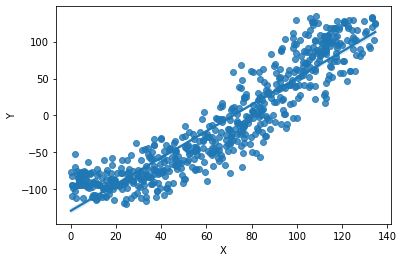

In [63]:
import seaborn as sns
sns.regplot(x="X",y="Y",data =Positive_X )



In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Positive_X.X, Positive_X.Y, test_size=0.2)

In [75]:
import statsmodels.formula.api as smf
model = smf.ols("Y ~ X", data=Positive_X).fit()


In [76]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     3579.
Date:                Sat, 18 Jun 2022   Prob (F-statistic):          8.89e-262
Time:                        16:09:46   Log-Likelihood:                -3006.9
No. Observations:                 631   AIC:                             6018.
Df Residuals:                     629   BIC:                             6027.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -129.4499      2.299    -56.311      0.000    -133.964    -124.936
X              1.8014      0.030     59.823      0.000       1.742       1.861
==============================================================================
Omnibus:                        5.138   Durbin-Watson:                   1.099
Prob(Omnibus):                  0.077   Jarque-Bera (JB):                3.720
Skew:                          -0.010   Prob(JB):                        0.156
Kurtosis:                       2.624   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

+ SO the p values are less than 0.05, The R squared value is also good.

In [80]:
def RMSE (actual,pred):
    temp = np.sqrt(np.mean((actual - pred)*(actual - pred)))
    return temp

In [85]:
pred = model.predict(Positive_X.X)
rmse= RMSE(Positive_X.Y,pred)
rmse

28.397348387581612

+ We are getting RMSE value of 28.39 for model without any transformation.

+ Thus the Linear model for positive values of X is
###     Y = -129.4499 + 1.8014 X

### Building Linear Regression for Negative Values of X

In [87]:
Negative_X = final_data[final_data.X<=0]

In [88]:
Negative_X

,X,Y
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1106,-115.366669,-121.000000
1107,-119.954237,-123.609122
1108,-109.942155,-127.197394
1109,-111.515368,-128.170885


In [89]:
Negative_X.corr()

,X,Y
X,1.000000,0.374943
Y,0.374943,1.000000


+ We are getting a very poor co-relation between X and Y for negative value of X.

Text(0, 0.5, 'Y')

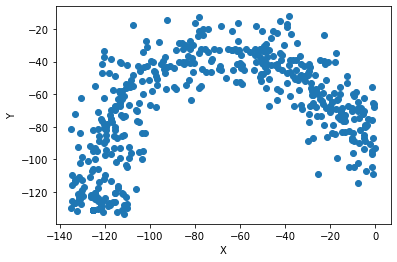

In [90]:
plt.scatter(Negative_X.X,Negative_X.Y)
plt.xlabel("X")
plt.ylabel("Y")

+ we clearly see that Y and X are related by a polynomial relation.
+ So We will perform transformation and try to make the relation linear in order to apply linear regression.

### Transformation

In [91]:
Negative_X ['log_y'] = np.log(abs(Negative_X.Y))

C:\Users\nilka\AppData\Local\Temp/ipykernel_95692/2679380294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Negative_X ['log_y'] = np.log(abs(Negative_X.Y))


In [92]:
Negative_X

,X,Y,log_y
0,-122.740667,-130.572085,4.871925
1,-121.531419,-129.938929,4.867065
2,-134.917019,-130.141832,4.868625
3,-120.605951,-125.760932,4.834383
4,-129.894781,-112.785214,4.725485
...,...,...,...
1106,-115.366669,-121.000000,4.795791
1107,-119.954237,-123.609122,4.817124
1108,-109.942155,-127.197394,4.845740
1109,-111.515368,-128.170885,4.853364


Text(0, 0.5, 'log |Y|')

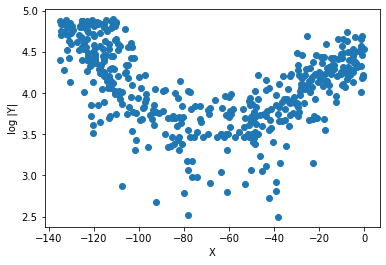

In [98]:
plt.scatter(Negative_X.X,Negative_X.log_y)
plt.xlabel("X")
plt.ylabel("log |Y|")

In [96]:
Negative_X ['log_x'] = np.log(abs(Negative_X.X))

C:\Users\nilka\AppData\Local\Temp/ipykernel_95692/3535507350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Negative_X ['log_x'] = np.log(abs(Negative_X.X))


Text(0, 0.5, 'Y')

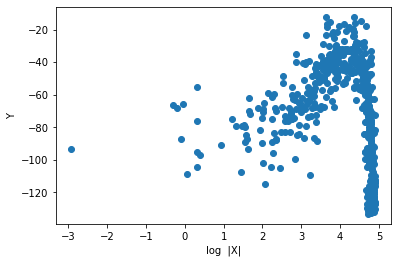

In [103]:
plt.scatter(Negative_X.log_x,Negative_X.Y)
plt.xlabel("log  |X|")
plt.ylabel("Y")

+ Log transformation is not giving us linear relation between the variables

In [101]:
Negative_X ['sqr_y'] = np.sqrt(abs(Negative_X.Y))

C:\Users\nilka\AppData\Local\Temp/ipykernel_95692/2801419796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Negative_X ['sqr_y'] = np.sqrt(abs(Negative_X.Y))


Text(0, 0.5, 'SQRT  |Y|')

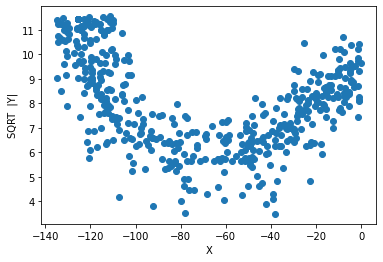

In [104]:
plt.scatter(Negative_X.X,Negative_X.sqr_y)
plt.xlabel("X")
plt.ylabel("SQRT  |Y|")

In [105]:
Negative_X ['log_sqr_y'] = np.log(np.sqrt(abs(Negative_X.Y)))

C:\Users\nilka\AppData\Local\Temp/ipykernel_95692/3396622321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Negative_X ['log_sqr_y'] = np.log(np.sqrt(abs(Negative_X.Y)))


Text(0, 0.5, 'log of SQRT  |Y|')

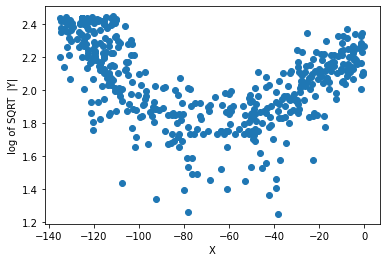

In [106]:
plt.scatter(Negative_X.X,Negative_X.log_sqr_y)
plt.xlabel("X")
plt.ylabel("log of SQRT  |Y|")

+ SO I am unable to convert it to linear relation using transformation.

+ We can also use Decision Tree Regressor for such cases with polynomial relation

In [107]:
from sklearn.tree import DecisionTreeRegressor 

In [108]:
regressor = DecisionTreeRegressor(random_state = 0) 

In [109]:
X_train, X_test, y_train, y_test = train_test_split(Negative_X.X, Negative_X.Y, test_size=0.2)

In [112]:
y_train

847   -120.613037
729    -48.618590
792    -56.536639
115    -51.665133
672    -79.090374
          ...    
111    -15.238591
195    -66.677175
43     -78.087838
683    -70.000000
61     -47.060377
Name: Y, Length: 384, dtype: float64

In [117]:
regressor.fit(X_train.values.reshape(-1,1),y_train.values.reshape(-1,1))

DecisionTreeRegressor(random_state=0)

In [119]:
y_pred = regressor.predict(X_test.values.reshape(-1,1))

In [128]:
y_pred =pd.DataFrame(y_pred)
y_pred

,0
0,-127.428571
1,-127.428571
2,-54.573633
3,-127.428571
4,-63.359041
...,...
91,-55.947190
92,-99.666803
93,-47.638973
94,-123.609122


In [129]:
y_test = pd.DataFrame(y_test)
y_test

,Y
1074,-131.000000
1082,-131.000000
83,-29.531183
32,-94.939585
767,-32.000000
...,...
749,-37.277285
41,-59.908751
753,-41.250780
837,-97.628830


In [131]:
from sklearn.metrics import mean_squared_error

In [132]:
mse = mean_squared_error(y_test, y_pred, squared=False)

In [135]:
print("RMSE : ",mse)

RMSE :  26.12382980295945
